In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
def len_of_employment(x):
  if pd.isnull(x["DateofTermination"]):
    return (pd.Timestamp.today() - pd.to_datetime(x.DateofHire)).days
  else:
    return (pd.to_datetime(x.DateofTermination)-pd.to_datetime(x.DateofHire)).days


In [ ]:
hr = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/hr.csv')

In [ ]:
hr["HireTimestamp"]=hr.DateofHire.to_timestamp
hr["CurrentEmployee"] = ~hr.DateofTermination.isna()

In [ ]:
hr['DaysofEmployment'] = hr.apply(len_of_employment, axis=1)
loe = hr.DaysofEmployment[0]

In [ ]:
hr["WeeksofEmployment"] = hr.DaysofEmployment/7
hr["YearsofEmployment"] = hr.WeeksofEmployment/52

In [ ]:
flt = hr[["DaysofEmployment","EngagementSurvey","EmpSatisfaction","EmpSatisfaction2", "DateofTermination", "CurrentEmployee", "WeeksofEmployment","YearsofEmployment"]].copy()

Most recent Employee Satisfaction Survey:

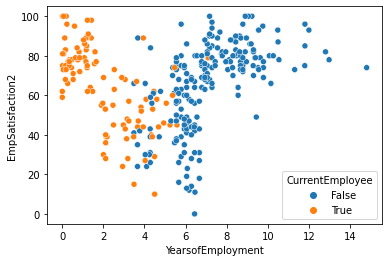

In [ ]:
sns.scatterplot(data=flt, y="EmpSatisfaction2", x="YearsofEmployment", hue="CurrentEmployee")

Engagement Survey:

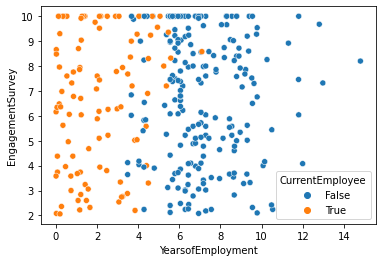

In [ ]:
sns.scatterplot(data=flt, y="EngagementSurvey", x="YearsofEmployment", hue="CurrentEmployee")

Old Employee Satisfaction Survey:

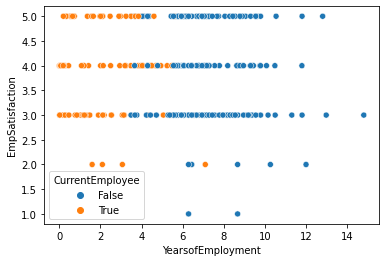

In [ ]:
sns.scatterplot(data=flt, y="EmpSatisfaction", x="YearsofEmployment", hue="CurrentEmployee")

There does appear to be a correlation between the new Employee Satisfaction survey results and the number of years an employee has been working. From the second year to the fourth year of employment, emplooyee satisfaction decreass. Then, employee satisfaction increases until about the seventh year of employment.

There does not appear to be any correlation between the Engagement survey results and the number of years an employee has been working.

There does not appear to be any correlation between the old Employee Satisfaction survey results and the number of years an employee has been working.